In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **포아송 분포**

 오늘은 이산형 변수 중 마지막이자, 가장 유용하다고 교수님이 이야기 하는 포아송 분포에 대해 배웠다.

​

 포아송 분포는  단위  시간 내 어떤 사건이 일어난 횟수를  λ 라고 할 때 해당 사건이 k 번 일어날 확률에 대한 분포이다. 

​

 확률 질량 함수를 나타내면 다음과 같다.

$P(X=k)=\ \frac{e^{-x}\lambda ^k}{k!}$


 이렇게 보면 더 무슨 말인지 모르겠지만, 예시를 들어 보면 좀  더 직관적이다.

 

**어떤 콜센터의 하루 총 통화량이 1000번 이였고, 그 중 0.5%가 민원 전화였다면, 하루에 10번의 민원 전화가 올 확률을 구해라**

​

  이는 하루 총 1000번의 통화 중 (n) , 각 전화가 민원 전화일 확률이 (0.005%) 인 사건이니 이항 분포로서도 표현 할 수 있다.

$X~Bin(n,p)=\binom{n}{k}p^k(1-p)^{n-k}$


  이 때 구하고자 하는 하루에 10번의 민원 전화가 올 확률에 대해서기에 k 에 10을 대입해서 구해주는 방법도 있다.

​

 하지만 만약 컴퓨터가 발명되기 전이였다면, 혹은 n 이 엄청 무수하게 크게 되다면 nCk 를 구하는데 있어 계산이 오래걸리기도하고, 계산이 불능인 경우도 있을 것이다. (실제로  1000! 은 2568 자리의 숫자이다)

​

 이런  문제를 해결하기 위한 것이 바로 포아송 분포이다. 

​

 포아송 분포는 n 이 충분히 크고 일어날 확률인 p 가 충분히 작을 경우, 이항 분포의 확률질량함수값과 거의 유사한, 근사치의 값을 계산해주는 분포이다.

​

 또한 포아송 분포는 이항 분포와 다르게 각 사건들이 완전히 독립이 아니더라도, 소량의 종속성이 있음에도 잘 작동하고, 각 사건마다 일어날 확률 자체가 무작위하더라도 잘 작동한다. 

​

 포아송 분포의 파라미터인 λ 는 단위 시간동안 해당 사건이 일어날 평균적인 횟수로서, 위에 예시로 든 사건은 B(1000, 0.005) 이니 

​

 λ  는 1000 * 0.005  로 5의 값을 갖는다.  

​

 그렇다면 이항 분포로 구한 확률 질량 함수 값과 포아송 분포로 구한 확률 질량 함수 값을 비교해보자 

In [2]:
N = 1000
p = 0.005 
k = 10

# 이항 분포로 계산해보기 

print('이항 분포로 계산')
print(math.comb(N,k) * p**k * (1-p)**(N-k))


# 포아송 분포로 계산해보기 
l = N*p 

print('포아송 분포로 계산')
print(
    (np.exp(-l) * l**k) /  math.factorial(k)
)


이항 분포로 계산
0.017996229182359907
포아송 분포로 계산
0.01813278870782187


Text(0.5, 0.98, 'N 이 충분히 크고 P 가 작다면 이항분포는 포아송 분포에 근사한다')

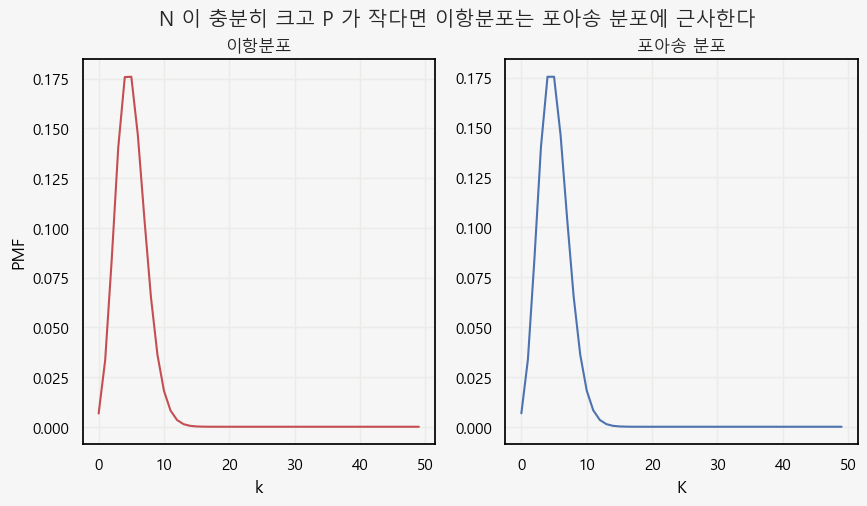

In [3]:
fig,ax = plt.subplots(ncols = 2,figsize = (10,5))

ax[0].plot(
    stats.binom(N,p).pmf(range(50)),
    c = 'r', label = '이항분포'
)
ax[0].set_xlabel('k')
ax[0].set_ylabel('PMF')
ax[0].set_title('이항분포')


ax[1].plot(
    stats.poisson(mu = N*p).pmf(range(50)),
    c = 'b', label = '포아송 분포'
)
ax[1].set_xlabel('K')
ax[1].set_title('포아송 분포')

fig.suptitle('N 이 충분히 크고 P 가 작다면 이항분포는 포아송 분포에 근사한다')

# **이항 분포가 포아송 분포로 근사하는 과정**

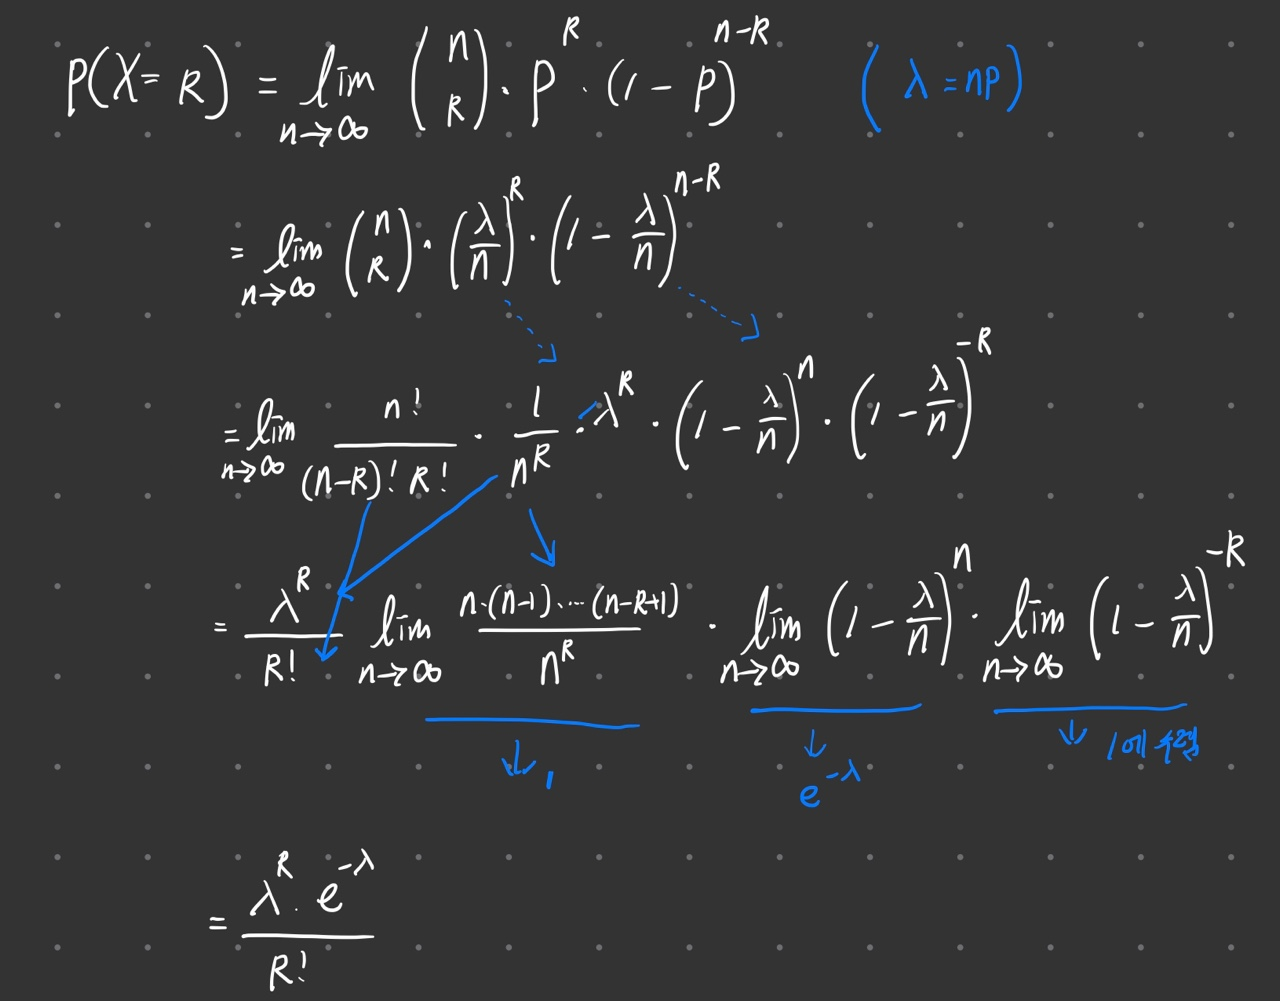

In [4]:
from PIL import Image

Image.open("C:/Users/whileduck/Desktop/포아송 분포 근사과정.jpg")

# **모수에 따른 포아송 분포 그래프 변화**

Text(0.5, 0.98, '$\\lambda$값에 따른 포아송 분포 변화')

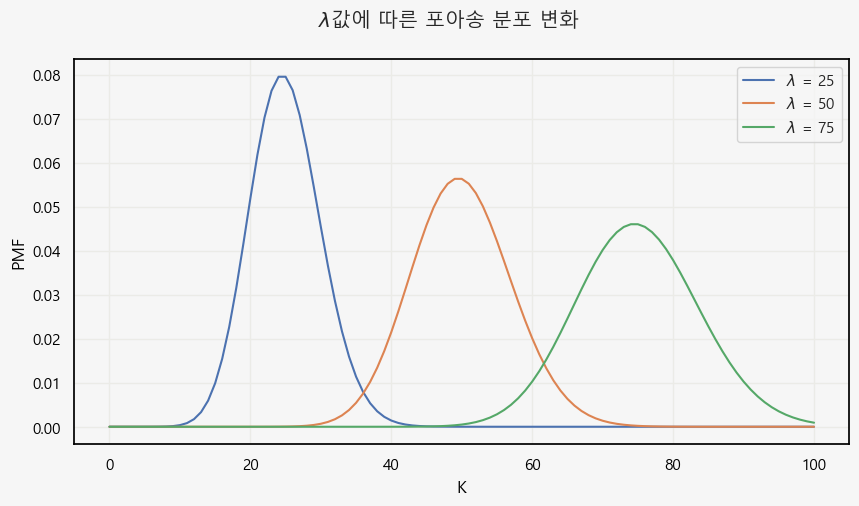

In [5]:
fig,ax = plt.subplots(figsize  = (10,5))

N = 100

for L in [25,50,75]:
    
    pmf = stats.poisson(mu = L).pmf(range(N+1))
    ax.plot(
        pmf,
        label = f'$\lambda$ = {L}'
    )
    ax.legend()
    
ax.set_xlabel('K')
ax.set_ylabel('PMF')
fig.suptitle('$\lambda$값에 따른 포아송 분포 변화')

​

 단위 기간 내 사건 발생 빈도(λ )가 높을 수록 분포에서 확률이 가장 높은 값들의 위치가 커지는 것을 볼 수 있다. 

​

  분포는 오른쪽으로 치우치는 경우가 많다.즉 오른쪽에 더 긴 꼬리가 있다. 이는 포아송 분포가 0에서 하한에 제한을 받지만, 상한에는 제한이 없기 때문이다. (사건이 0번 이하 발생 할 가능성은 없지만, 사건이 무한번 이상 발생할 가능성이 아예 없지는 않기 때문


# **포아송 분포 예제 풀이**

 * 어떤 전공책 5페이지를 검사했는데 오타가 총 10개 발견되었다고 한다. 이 때 한 페이지를 검사했을 때 오타가 3개 나올 확률 

In [15]:
def poisson(mu,k):
    
    return np.exp(-mu) * mu**(k) / math.factorial(k)
    

In [16]:
total_pages = 5
errors = 10 

mu = errors/total_pages

k = 3

print('한 페이지에서 오타가 3개 발견 될 확률은')
print(
    poisson(mu,k)
)

한 페이지에서 오타가 3개 발견 될 확률은
0.1804470443154836


어떤 택배회사의 전화 상담실에는 1시간당 평균 240건의 전화 요청이 들어온다. 1분간 걸려오는 전화 요청이 2건 이하 일 확률

In [17]:
mu = 240/60

print(poisson(mu,0) + poisson(mu,1) + poisson(mu,2))

0.2381033055535443
